In [1]:
import pandas
import pandas as pd

In [7]:
#Dados Relativos à pandemia COVID-19 em Portugal
#Página do dado: https://github.com/dssg-pt/covid19pt-data/blob/master/data.csv
dados_capes_cc = pd.read_csv("https://raw.githubusercontent.com/dssg-pt/covid19pt-data/refs/heads/master/data.csv")
dados_capes_cc.head(15)

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
0,26-02-2020,26-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-02-2020,27-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28-02-2020,28-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29-02-2020,29-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-03-2020,01-03-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,02-03-2020,02-03-2020 00:00,2,2,0,0,0,0,0,0,...,NaN,NaN,NaN,2.0,0.0,2.0,NaN,NaN,NaN,NaN
6,03-03-2020,03-03-2020 16:00,4,2,1,1,0,0,0,0,...,NaN,NaN,NaN,4.0,0.0,4.0,NaN,NaN,NaN,NaN
7,04-03-2020,04-03-2020 17:00,6,3,1,2,0,0,0,0,...,NaN,NaN,NaN,6.0,0.0,6.0,NaN,NaN,NaN,NaN
8,05-03-2020,05-03-2020 17:00,9,5,1,3,0,0,0,0,...,NaN,NaN,NaN,9.0,0.0,9.0,NaN,NaN,NaN,NaN
9,06-03-2020,06-03-2020 17:00,13,8,1,4,0,0,0,0,...,NaN,NaN,NaN,13.0,0.0,13.0,NaN,NaN,NaN,NaN


In [8]:
dados_capes_cc.tail(15)

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
772,06-09-2022,06-09-2022 00:00,5269090,1786779,829478,1906445,221154,231048,129263,142273,...,NaN,NaN,NaN,NaN,398.0,NaN,166.0,166.0,0.99,0.99
773,13-09-2022,13-09-2022 00:00,5285547,1792203,832841,1911649,221827,231812,129703,142862,...,NaN,NaN,NaN,NaN,419.0,NaN,160.0,160.0,0.98,0.98
774,20-09-2022,20-09-2022 00:00,5303862,1798234,836278,1917697,222480,232927,130002,143594,...,NaN,NaN,NaN,NaN,395.0,NaN,178.0,178.0,1.02,1.02
775,27-09-2022,27-09-2022 00:00,5323565,1804511,839836,1924610,223314,234065,130266,144313,...,NaN,NaN,NaN,NaN,378.0,NaN,191.0,191.0,1.06,1.06
776,04-10-2022,04-10-2022 00:00,5338417,1808853,842311,1930115,223976,235017,130498,144997,...,NaN,NaN,NaN,NaN,375.0,NaN,144.0,144.0,0.98,0.98
777,11-10-2022,11-10-2022 00:00,5345177,1810678,843376,1932416,224318,235461,130698,145580,...,NaN,NaN,NaN,NaN,392.0,NaN,66.0,66.0,0.65,0.65
778,18-10-2022,18-10-2022 00:00,5352517,1812540,844421,1935074,224616,235783,131062,146389,...,NaN,NaN,NaN,NaN,433.0,NaN,71.0,71.0,0.85,0.85
779,25-10-2022,25-10-2022 00:00,5360270,1814189,846509,1937641,224883,236128,131312,146976,...,NaN,NaN,NaN,NaN,443.0,NaN,75.0,75.0,1.00,1.00
780,01-11-2022,01-11-2022 00:00,5366190,1815629,847332,1939941,225175,236348,131559,147574,...,NaN,NaN,NaN,NaN,491.0,NaN,57.0,57.0,0.87,0.87
781,08-11-2022,08-11-2022 00:00,5372111,1816862,848108,1942111,225419,236571,131748,148030,...,NaN,NaN,NaN,NaN,537.0,NaN,51.0,51.0,0.97,0.97


In [9]:
dados_capes_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 93 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   data                               782 non-null    object 
 1   data_dados                         782 non-null    object 
 2   confirmados                        782 non-null    int64  
 3   confirmados_arsnorte               782 non-null    int64  
 4   confirmados_arscentro              782 non-null    int64  
 5   confirmados_arslvt                 782 non-null    int64  
 6   confirmados_arsalentejo            782 non-null    int64  
 7   confirmados_arsalgarve             782 non-null    int64  
 8   confirmados_acores                 782 non-null    int64  
 9   confirmados_madeira                782 non-null    int64  
 10  confirmados_estrangeiro            16 non-null     float64
 11  confirmados_novos                  747 non-null    float64

In [10]:
dados_capes_cc.describe()

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,...,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos,incidencia_nacional,incidencia_continente,rt_nacional,rt_continente
count,7.820000e+02,7.820000e+02,782.000000,7.820000e+02,782.000000,782.000000,782.000000,782.000000,16.00000,747.000000,...,719.000000,76.000000,76.000000,740.000000,777.000000,691.000000,394.000000,394.000000,394.000000,394.000000
mean,9.218029e+05,3.514707e+05,131644.052430,3.430815e+05,33314.382353,33897.510230,11582.785166,16231.728900,9.12500,4568.959839,...,5909.236439,27.223684,20.052632,80950.824324,1045.562420,720.688857,872.684518,870.493909,1.016447,1.016447
std,1.128087e+06,3.993549e+05,174769.015431,4.067784e+05,45047.056552,49002.065918,24633.632775,30335.977441,5.86373,9919.974586,...,4056.853302,14.588213,9.234565,131755.759755,1153.619674,1114.467986,1628.235666,1627.442666,0.133895,0.139001
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,23.000000,0.000000,0.000000,2.000000,0.000000,-152.000000,50.300000,47.500000,0.650000,0.650000
25%,6.105650e+04,2.211800e+04,5014.000000,3.134550e+04,1003.750000,1174.750000,227.250000,173.250000,5.00000,402.500000,...,960.500000,15.000000,13.000000,21856.500000,346.000000,73.000000,84.400000,83.250000,0.922500,0.920000
50%,8.179950e+05,3.295985e+05,116717.000000,3.099205e+05,28920.000000,20483.000000,3977.000000,8379.000000,9.00000,911.000000,...,8784.000000,21.000000,19.000000,32915.500000,561.000000,312.000000,216.450000,221.400000,1.015000,1.020000
75%,1.071259e+06,4.108448e+05,143171.750000,4.141882e+05,39031.500000,42798.250000,8900.250000,12324.000000,11.00000,3589.500000,...,9365.000000,43.000000,28.500000,70262.500000,1210.000000,743.000000,521.325000,527.000000,1.110000,1.110000
max,5.372111e+06,1.816862e+06,848108.000000,1.942111e+06,225419.000000,236571.000000,131748.000000,148030.000000,21.00000,65706.000000,...,11225.000000,46.000000,33.000000,642793.000000,6004.000000,6204.000000,7163.700000,7207.000000,1.430000,1.430000


<Axes: ylabel='Frequency'>

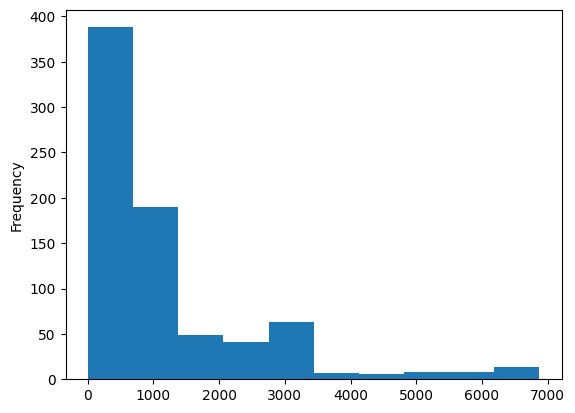

In [11]:
dados_capes_cc['internados'].plot(kind="hist")

In [13]:
#Dados Relativos à pandemia COVID-19 no Brasil
#Página do dado: https://raw.githubusercontent.com/henriquemor/covid19-Brazil-timeseries/refs/heads/master/confirmed-cases.csv
dados_capes_cc = pd.read_csv("https://raw.githubusercontent.com/henriquemor/covid19-Brazil-timeseries/refs/heads/master/confirmed-cases.csv")
dados_capes_cc.head(15)

,Unnamed: 0,Unnamed: 1,26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,...,30/11/2021,01/12/2021,02/12/2021,03/12/2021,04/12/2021,05/12/2021,06/12/2021,07/12/2021,08/12/2021,09/12/2021
0,Brasil,BR,1,1,1,2,2,2,2,3,...,22094459,22105872,22118782,22129409,22138247,22143091,22147476,22157726,22167781,22177059
1,Acre,AC,0,0,0,0,0,0,0,0,...,88213,88220,88223,88225,88228,88228,88239,88241,88254,88264
2,Amapá,AP,0,0,0,0,0,0,0,0,...,124634,124685,124755,124825,124893,124935,124990,125081,125161,125252
3,Amazonas,AM,0,0,0,0,0,0,0,0,...,429944,430073,430192,430350,430484,430519,430602,430790,430992,431086
4,Pará,PA,0,0,0,0,0,0,0,0,...,608696,609392,610087,610832,611527,611662,611790,612569,613264,613978
5,Rondônia,RO,0,0,0,0,0,0,0,0,...,277374,277374,278434,278882,279068,279120,279421,279901,280199,280495
6,Roraima,RR,0,0,0,0,0,0,0,0,...,128397,128408,128475,128545,128584,128603,128603,128649,128696,128717
7,Tocantins,TO,0,0,0,0,0,0,0,0,...,232575,232808,232945,233141,233352,233352,233454,233513,233814,234113
8,Norte,(N),0,0,0,0,0,0,0,0,...,1889833,1890960,1893111,1894800,1896136,1896419,1897099,1898744,1900380,1901905
9,Alagoas,AL,0,0,0,0,0,0,0,0,...,241490,241513,241535,241565,241599,241638,241697,241740,241764,241772
